In [38]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import multiprocessing
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import scikitplot as skplt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from scipy import spatial
import warnings
warnings.filterwarnings('ignore')
cores = multiprocessing.cpu_count()
os.listdir()

['GaussianNB Confusion Matrix of 5.png',
 'opencv-text-detection.zip',
 '.ipynb_checkpoints',
 'accepted_projects',
 'Andrew W. Trask - Grokking Deep Learning-Manning Publications (2019).pdf',
 'Collective_Dataset',
 'corpus',
 'corpus.zip',
 'doc2vec.ipynb',
 'doc2vec_with_kfold.html',
 'doc2vec_with_kfold.ipynb',
 'Final Slides and Books',
 'For Paper',
 'GaussianNB Confusion Matrix of 1.png',
 'GaussianNB Confusion Matrix of 2.png',
 'GaussianNB Confusion Matrix of 3.png',
 'GaussianNB Confusion Matrix of 4.png',
 'PaperBibTex',
 'Papers',
 'Papers.zip',
 'Papers_Association_Rule',
 'processed_dataset.csv',
 'Results',
 'reviews.txt',
 'sentiment_analysis_from_story_preprocessing.html',
 'sentiment_analysis_from_story_preprocessing.ipynb',
 'sentiment_dictionary.csv',
 'sklearn_test.ipynb',
 'Slides',
 'Story-categorization-using-NLP',
 'Tan.pdf',
 'Testing',
 'Udacity',
 'Untitled.ipynb',
 'videodata.csv',
 'word2vec.model',
 'word2vector_test.ipynb',
 'wu2007.pdf',
 'google-play-s

In [2]:
df = pd.read_csv(os.getcwd() + "/Collective_Dataset/419_data - Sheet1.csv", usecols=[0,1])#header=None, , names=['story', 'category']

In [3]:
df = df.sample(frac=1).reset_index(drop=True)

In [4]:
df.head(10)

,story,category
0,It all started when I was 8. My group of frien...,1
1,My so-called ‘friends’ in middle school used t...,1
2,"Back when I was in high school, a classmate of...",1
3,I realized this within first six months of my ...,0
4,I couldn’t get pregnant for years in my toxic ...,0
5,I am 15 now and I have been bullied since Grad...,1
6,I was around 12-13 years old and at this “meet...,1
7,I was at my powerlifting gym squatting early i...,2
8,I was employed as a testing Co-ordinator on a ...,0
9,When I was 14 I worked at Tim Hortons in Canad...,2


In [5]:
df['story']

0      It all started when I was 8. My group of frien...
1      My so-called ‘friends’ in middle school used t...
2      Back when I was in high school, a classmate of...
3      I realized this within first six months of my ...
4      I couldn’t get pregnant for years in my toxic ...
                             ...                        
265    You would not believe the number of times I wa...
266    I was fifteen or sixteen, in my final year of ...
267    When I was in the corporate world, I always fe...
268    It all began in the 2nd grade, I was about 3 y...
269    I don’t know how to start this but I really ne...
Name: story, Length: 270, dtype: object

In [6]:
df['category']

0      1
1      1
2      1
3      0
4      0
      ..
265    2
266    2
267    0
268    1
269    2
Name: category, Length: 270, dtype: int64

In [7]:
df.shape

(270, 2)

In [8]:
df.index = range(270)

In [9]:
df.story.apply(lambda x: len(x.split(' '))).sum()

50346

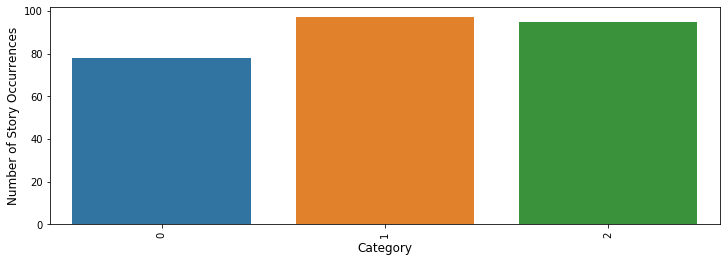

In [10]:
cnt_pro = df['category'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=1)
plt.ylabel('Number of Story Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [11]:
work_stress_counter, bullying_counter, sexual_harassment_counter = 0, 0, 0
for c in df['category']:
    if c==0:
        work_stress_counter+=1
    elif c == 1:
        bullying_counter+=1
    else:
        sexual_harassment_counter+=1
print("Work Stress Total Data Count: ", work_stress_counter)
print("Bullying Total Data Count: ", bullying_counter)
print("Sexual Harassment Total Data Count: ", sexual_harassment_counter)
print("Total Data Count: ", work_stress_counter + bullying_counter + sexual_harassment_counter)

Work Stress Total Data Count:  78
Bullying Total Data Count:  97
Sexual Harassment Total Data Count:  95
Total Data Count:  270


In [12]:
# colors = ("red","green","blue")
# area = np.pi*3

# dt = (df['story'], )
# # Plot
# plt.scatter(df['story'], df['category'], s=area, c=colors, alpha=0.5)
# plt.title('Scatter Plot of Data Occurrences')
# plt.xlabel('Data')
# plt.ylabel('Category')
# plt.show()
df.iloc[[2]]

,story,category
2,"Back when I was in high school, a classmate of...",1


In [13]:
print(df.story[50])
print(df.category[50])

I went back to college last year. I am nearly done. Without friends & family continued support and a tutor I would have either quit or gone into a deep depression. The daily hours of work are isolating & frustrating. Leaves no time for life outside work & school. Now nearing the end I thought I would be hyper motivated. Yet I keep getting bogged down by the stress of it all.
0


In [14]:
print(df.story[0])
print(df.category[0])

It all started when I was 8. My group of friends started to bully me. I tried to stand up for myself and kicked the leader of the bullies. It stopped her but the other bullies carried on. So I was put in to a friendship group with them which didn't help at all. When I was 9 we all moved up to the local middle school. I thought it would be a fresh start. But it wasn't. They continued to bully me by beating me up on the way to school, calling me names and talking about me behind my back, spreading rumours around my year. My teachers started to get suspicious. I was 12 when I eventually told my friends who then told my most trusted teacher. I told her what they were doing to me and it was sorted. It took me another 6 months to tell my friends the whole story and that I lived with depression for 3 years and am still living with it. I am currently being counselled for my bullying in school by my teachers and have told most of my friends about the bullying, depression and counselling. Please

In [15]:
print(df.story[10])
print(df.category[10])

I had been seeing this guy for just over three months. We both drank a lot. One night, he got really mad at me and he called me a lot of names, and then pushed me against the wall. I got really scared but he said he was sorry and he’d never do it again. Another night, he wanted to make love and I asked him to put on a condom. He said he didn’t have one. I asked him to stop, and he wouldn’t. And he said that it didn’t matter, not to worry about it. At first, I sort of laughed cause i thought he was joking, but then I realized he was serious and I got scared. I told him to stop but he wouldn’t, and I pushed him away but he pushed me back and pinned me down with his body. He was very strong. He raped me.
2


In [16]:
max_len = 0
para = None
for s in df['story']:
    if len(s) > max_len:
        max_len = len(s)
        para = s
print(max_len)
print(para)

4170
I met him on plentyoffish.com and we went on two dates. There was no sexual relationship between us. I was lonely and a little depressed like I usually was after Christmas when I messaged him on Facebook. It was early in the morning, between 3am and 5am. I was sober. I drove to the address he gave me in Sauk Rapids. It was an apartment building. He let me in the security door and I followed him to a 2nd floor apartment. He was stumbling a little. We walked into the apartment and I met his friend. His friend left. I looked around the apartment. There was empty pop and liquor bottles covering the counter, along with red solo cups. I saw an army duffle bag and a large gun. In the living room there was a leather couch, glass coffee table and a big screen. I was standing at the back of the couch when he came up behind me. He put his arms gently around my waist and softly kissed my neck. His fingers slid under my pants and he started to try to pull them down, but these jeans were tight 

In [17]:
min_len = 4170
para = None
for s in df['story']:
    if len(s) < min_len:
        min_len = len(s)
        para = s
print(min_len)
print(para)

114
In college days, gangs of boys beat me up when they found me alone because I told them to simply move from my seat


In [18]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['story'] = df['story'].apply(cleanText)

In [19]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

### WITH TRAIN_TEST_SPLIT

In [20]:
train, test = train_test_split(df, test_size = .20, random_state = 2)

In [21]:
train_tagged = train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
test_tagged = test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)

In [22]:
train

,story,category
134,"when i was in grade 2 or 3, these two older gi...",1
101,i was in class 11. i was coming back from my t...,1
127,"it was when i was in 9th grade, there was a gr...",1
197,"i loved my work, but hated going each day beca...",0
24,when i was in year 3 i got bullied for my skin...,1
...,...,...
75,i have been called hurtful names and i have be...,1
22,back in 2011 when i was in the 1st year of my ...,1
72,"when i got admitted in a well reputed college,...",1
15,my story might be short because i only remembe...,1


In [23]:
len(train)

216

In [24]:
test

,story,category
131,i’ve had customers follow me around the store ...,2
183,back in 6th grade these two kids started being...,1
200,it was actually around a year ago when all thi...,0
65,"the summer after i graduated from college, i w...",2
91,i got so much shit one day because i was on my...,0
115,i was abused by my father’s cousin brother. no...,2
93,"hello! first of all, i'm sorry if there are a ...",1
242,i am currently 17 years old and a junior in hi...,1
29,i have a chronic illness which was doing well ...,0
3,i realized this within first si months of my j...,0


In [25]:
len(test)

54

In [26]:
train_tagged

134    ([when, was, in, grade, or, these, two, older,...
101    ([was, in, class, 11., was, coming, back, from...
127    ([it, was, when, was, in, 9th, grade, there, w...
197    ([loved, my, work, but, hated, going, each, da...
24     ([when, was, in, year, got, bullied, for, my, ...
                             ...                        
75     ([have, been, called, hurtful, names, and, hav...
22     ([back, in, 2011, when, was, in, the, 1st, yea...
72     ([when, got, admitted, in, well, reputed, coll...
15     ([my, story, might, be, short, because, only, ...
168    ([when, was, 77, was, at, brunch, and, man, ca...
Length: 216, dtype: object

In [27]:
train_tagged.values[2]

TaggedDocument(words=['it', 'was', 'when', 'was', 'in', '9th', 'grade', 'there', 'was', 'group', 'of', 'students', 'who', 'used', 'to', 'call', 'me', 'mr', 'popo', 'yes', 'mr.', 'popo', 'is', 'the', 'chubby', 'pitch', 'black', 'character', 'from', 'popular', 'tv', 'series', 'dragonballz', 'as', 'was', 'dark', 'toned', 'myself', 'and', 'was', 'bit', 'on', 'the', 'fat', 'side', 'compared', 'to', 'others', 'they', 'gave', 'me', 'that', 'name', 'it', 'was', 'annoying', 'most', 'of', 'the', 'times', 'as', 'they', 'call', 'me', 'out', 'of', 'nowhere', 'for', 'no', 'reason', 'my', 'father', 'was', 'rab', 'officer', 'since', 'rab', 'officers', 'wear', 'all', 'black', 'they', 'also', 'used', 'to', 'call', 'my', 'father', 'daddy', 'popo', 'it', 'was', 'insulting', 'and', 'disturbing', 'at', 'the', 'same', 'time', 'complained', 'to', 'my', 'homeroom', 'teacher', 'but', 'there', 'was', 'nothing', 'he', 'could', 'do', 'to', 'help', 'me', 'after', 'my', 'graduation', 'from', 'high', 'school', 'never

In [28]:
test_tagged.values[1]

TaggedDocument(words=['back', 'in', '6th', 'grade', 'these', 'two', 'kids', 'started', 'being', 'total', 'jerks', 'to', 'my', 'friends', 'and', 'then', 'to', 'me', 'in', 'the', 'class', 'everyday', 'in', 'class', 'when', 'the', 'teacher', 'was', 'not', 'around', 'would', 'get', 'called', 'gay', 'pussy', 'girl', 'pretty', 'much', 'every', 'thing', 'they', 'could', 'they', 'did', 'say', 'and', 'that', 'was', 'not', 'even', 'the', 'worst', 'of', 'it', 'we', 'played', 'football', 'and', 'whenever', 'would', 'get', 'close', 'to', 'the', 'goal', 'post', 'they', 'would', 'make', 'foul', 'moves', 'and', 'beat', 'me', 'down', 'when', 'we', 'would', 'play', 'tag', 'team', 'they', 'would', 'only', 'follow', 'me', 'around', 'and', 'make', 'me', 'cry', 'my', 'teacher', 'never', 'saw', 'any', 'of', 'it', 'the', 'thing', 'is', 'for', 'me', 'then', 'used', 'to', 'be', 'the', 'happy', 'go', 'lucky', 'kid', 'and', 'so', 'my', 'mind', 'always', 'thought', 'put', 'your', 'friends', 'happiness', 'before', 

### PV-DBOW

In [29]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 216/216 [00:00<00:00, 1572864.00it/s]


In [31]:
%%time
for epoch in range(5):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 216/216 [00:00<00:00, 730620.70it/s]

CPU times: user 371 ms, sys: 7.35 ms, total: 378 ms
Wall time: 130 ms


In [32]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [33]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

In [34]:
print(X_train[0])
print(y_train[0])
print(type(X_train))

[ 0.03210113 -0.1594617   0.13566217  0.09772306 -0.21938507 -0.27614525
 -0.07431911  0.15583931 -0.15854305 -0.14917757 -0.0995967  -0.00543896
 -0.17957029  0.13233079 -0.3753427   0.37408668 -0.08912812  0.0521798
  0.4594182   0.4067128  -0.31415537  0.3921272  -0.26252973  0.11034477
 -0.04434098  0.09861075 -0.19370203 -0.0359584   0.19760288 -0.44587183
  0.30849686 -0.490001   -0.28700295 -0.03043123  0.33942947  0.22770996
  0.13136944 -0.12967265 -0.37625936  0.2066511   0.10971963  0.05587547
  0.07878859 -0.44872713 -0.17728183 -0.40140897 -0.26410788 -0.11314894
  0.1042641   0.33363014 -0.4372717   0.03329143 -0.26850137 -0.08750855
  0.07390924  0.05796211 -0.3790697   0.16081075  0.09416034 -0.29548514
  0.39440325 -0.33251697  0.33926237  0.31373096 -0.23641019  0.19043583
 -0.09726026 -0.24387313 -0.5246251  -0.3158078  -0.28577337 -0.4257596
  0.4129674   0.02877945  0.05917262 -0.38840884  0.10036358  0.22175829
  0.27046874 -0.0268016  -0.28664008  0.20792522 -0.0

In [35]:
y_train

(1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 2,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 0,
 1,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 2,
 2,
 2,
 1,
 1,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 2,
 2,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 0,
 0,
 2,
 1,
 1,
 2,
 2,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 1,
 2,
 0,
 2,
 2,
 1,
 1,
 1,
 1,
 2)

In [36]:
# colors = (0,0,0)
# area = np.pi*3

# # Plot
# plt.scatter(X_train, y_train, s=area, c=colors, alpha=0.5)
# plt.title('Scatter Plot For First Trainig Paragraph Vector Data')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

In [37]:
# import scikitplot as skplt
# # fig = plt.figure()
# # ax = fig.add_axes([0,0,1,1])
# # ax.axis('equal')
# # # langs = ['C', 'C++', 'Java', 'Python', 'PHP']
# # # students = [23,17,35,29,12]
# # ax.pie(X_train, labels = y_train,autopct='%1.2f%%')
# # plt.show()
# model_dbow.docvecs.similarity('1', '2')

In [39]:
f1 = 'this is frustrating working in projects that are done but due to the gut of the professor I have to work again and again.'
f2 = 'I knew this guy for a few days but one day he hit up on be and told me to get physical with him which i found so offensive.'
v1 = model_dbow.infer_vector(f1.split())
v2 = model_dbow.infer_vector(f2.split())

similarity = spatial.distance.cosine(v1, v2)
similarity

0.003895103931427002

In [37]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [38]:
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\nTesting Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred),"\n")
print('Testing Classification Report: ')
print(classification_report(y_test, y_pred))

Testing accuracy 0.9074074074074074
Testing F1 score: 0.908911906256539

Testing Confusion Matrix: 
[[10  0  1]
 [ 2 28  0]
 [ 1  1 11]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.97      0.93      0.95        30
           2       0.92      0.85      0.88        13

    accuracy                           0.91        54
   macro avg       0.88      0.90      0.89        54
weighted avg       0.91      0.91      0.91        54



### PV-DM

In [39]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 216/216 [00:00<00:00, 784389.32it/s]


In [40]:
%%time
for epoch in range(5):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

100%|██████████| 216/216 [00:00<00:00, 862828.25it/s]

CPU times: user 455 ms, sys: 17 ms, total: 472 ms
Wall time: 200 ms


In [41]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)

In [42]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [43]:
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\nTesting Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred),"\n")
print('Testing Classification Report: ')
print(classification_report(y_test, y_pred))

Testing accuracy 0.8888888888888888
Testing F1 score: 0.8901327567366487

Testing Confusion Matrix: 
[[ 9  0  2]
 [ 1 28  1]
 [ 1  1 11]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.97      0.93      0.95        30
           2       0.79      0.85      0.81        13

    accuracy                           0.89        54
   macro avg       0.86      0.87      0.86        54
weighted avg       0.89      0.89      0.89        54



### Paired Model

In [44]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [45]:
new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

In [46]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [47]:
y_train, X_train = get_vectors(new_model, train_tagged)
y_test, X_test = get_vectors(new_model, test_tagged)

In [48]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [49]:
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\nTesting Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred),"\n")
print('Testing Classification Report: ')
print(classification_report(y_test, y_pred))

Testing accuracy 0.8888888888888888
Testing F1 score: 0.8896526469972798

Testing Confusion Matrix: 
[[10  0  1]
 [ 1 28  1]
 [ 2  1 10]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.97      0.93      0.95        30
           2       0.83      0.77      0.80        13

    accuracy                           0.89        54
   macro avg       0.86      0.87      0.86        54
weighted avg       0.89      0.89      0.89        54



### WITH K-FOLD

In [50]:
X = df['story']
print("Length: ", len(X))
print("Type: ", type(X))
print("First Ten Values:\n", X[:10])
print(X[0])

Length:  270
Type:  <class 'pandas.core.series.Series'>
First Ten Values:
 0    i traveled around the country with a consultan...
1    i remember just before christmas going to the ...
2    i worked a similar job in telemarketing. my he...
3    i was abused by my father’s cousin brother. no...
4    my step dad touched me when i was 6. i don’t r...
5    this one time, a man came in with his son. whe...
6    during my sophomore year at wake forest, i was...
7    i was in a managerial job with a lot of sites,...
8    i worked for almost 30 years in auto finance. ...
9    i worked at a call center for over 5 years. it...
Name: story, dtype: object
i traveled around the country with a consultant hired as a rainmaker. he was 63 years old with dyed brown hair, a bad face lift and skin pigmentation issues. one day as we were driving in his car, he put his hand on my thigh and asked me if i'd like to have a supplemental seual relationship with him. i knew we were working for the big leagues bec

In [51]:
y = df['category']
print("Length: ", len(y))
print("Type: ", type(y))
print("First Ten Values: ", y[:10])

Length:  270
Type:  <class 'pandas.core.series.Series'>
First Ten Values:  0    2
1    0
2    0
3    2
4    2
5    2
6    2
7    0
8    0
9    0
Name: category, dtype: int64


In [52]:
ten_fold = KFold(n_splits=5, shuffle = True, random_state=42)
ten_fold

KFold(n_splits=5, random_state=42, shuffle=True)

In [53]:
print("Total Fold: ", ten_fold.get_n_splits(X))
fold_no = 1
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("X_train: ", X_train.shape, "X_test: ", X_test.shape)

Total Fold:  5
X_train:  (216,) X_test:  (54,)
X_train:  (216,) X_test:  (54,)
X_train:  (216,) X_test:  (54,)
X_train:  (216,) X_test:  (54,)
X_train:  (216,) X_test:  (54,)


In [54]:
total_fold = ten_fold.get_n_splits(X)
print(total_fold)

5


### K-FOLD PV-DBOW

In [55]:
print("Total Fold: ", total_fold)
fold_no = 1
for train_index, test_index in ten_fold.split(X):
    print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("No. of Training Dataset in Fold: ", fold_no, "", len(X_train))
    print("No. of Testing Dataset in Fold: ", fold_no, "", len(X_test))
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
    
    logreg = LogisticRegression(n_jobs=1, C=1e5)
    logreg.fit(X_trained, y_trained)
    y_pred = logreg.predict(X_tested)
    
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    
    print("\n\n")
    fold_no+=1

Total Fold:  5
Train Fold No.:  [  0   1   2   3   4   5   7   8  10  11  12  13  14  16  17  18  20  21
  23  26  27  28  29  31  32  33  34  35  36  37  38  39  40  41  43  44
  47  48  49  50  51  52  53  54  55  56  57  58  59  61  62  63  64  65
  66  69  70  71  72  73  74  75  76  78  80  81  83  84  85  86  87  88
  89  91  92  94  95  96  97  98  99 100 101 102 103 105 106 107 108 110
 111 112 114 115 117 121 122 123 124 126 128 129 130 131 132 133 134 135
 136 138 139 140 141 142 143 145 147 148 149 150 151 153 154 155 156 157
 159 160 161 162 163 164 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 181 182 184 186 187 188 189 190 191 192 193 195 197 198 200 201
 202 203 204 205 206 207 210 211 212 213 214 215 217 218 219 220 222 223
 225 228 229 230 231 233 234 235 236 237 238 239 240 241 242 243 245 246
 248 249 251 253 254 255 256 257 258 259 260 261 262 263 264 265 267 269]  Test Fold No.:  [  6   9  15  19  22  24  25  30  42  45  46  60  67  68  77  79  82  90
 

100%|██████████| 216/216 [00:00<00:00, 896999.67it/s]


Fold No.:  1
Testing accuracy 0.8518518518518519
Testing F1 score: 0.8505285773578456

Testing Confusion Matrix: 
[[16  1  1]
 [ 1 18  1]
 [ 2  2 12]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.86      0.90      0.88        20
           2       0.86      0.75      0.80        16

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54




Train Fold No.:  [  0   1   3   4   5   6   7   8   9  11  12  13  14  15  17  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  34  35  36  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  53  54  56  57  58  59  60  61
  62  63  64  65  67  68  70  71  72  77  79  80  81  82  83  85  87  88
  89  90  91  93  94  95  98  99 100 102 103 104 105 106 107 109 110 113
 114 116 117 118 119 120 121 122 123 125 127 128 

100%|██████████| 216/216 [00:00<00:00, 1318733.14it/s]


Fold No.:  2
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8867710528957141

Testing Confusion Matrix: 
[[11  3  1]
 [ 0 18  0]
 [ 1  1 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.82      1.00      0.90        18
           2       0.95      0.90      0.93        21

    accuracy                           0.89        54
   macro avg       0.89      0.88      0.88        54
weighted avg       0.90      0.89      0.89        54




Train Fold No.:  [  1   2   3   6   7   8   9  10  13  14  15  16  17  18  19  20  21  22
  23  24  25  30  33  34  37  38  39  40  42  43  44  45  46  47  48  49
  50  52  53  54  55  57  58  59  60  62  63  64  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  86  87  88  89  90
  91  92  93  94  96  97  99 101 102 103 104 105 106 107 108 109 110 111
 112 113 115 116 118 119 120 121 123 124 125 126 

100%|██████████| 216/216 [00:00<00:00, 575218.83it/s]


Fold No.:  3
Testing accuracy 0.9074074074074074
Testing F1 score: 0.9043911850221461

Testing Confusion Matrix: 
[[12  3  1]
 [ 0 22  0]
 [ 1  0 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.88      1.00      0.94        22
           2       0.94      0.94      0.94        16

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.90        54




Train Fold No.:  [  0   2   4   5   6   8   9  10  11  12  13  14  15  16  17  18  19  20
  21  22  24  25  26  27  28  29  30  31  32  33  35  36  37  38  41  42
  45  46  48  50  51  52  54  55  56  57  58  59  60  61  63  65  66  67
  68  69  71  72  73  74  75  76  77  78  79  82  84  85  86  87  88  89
  90  92  93  95  96  97  98  99 100 101 102 104 106 107 108 109 111 112
 113 114 115 116 117 118 119 120 121 122 124 125 

100%|██████████| 216/216 [00:00<00:00, 1320655.49it/s]


Fold No.:  4
Testing accuracy 0.8518518518518519
Testing F1 score: 0.8519694297472076

Testing Confusion Matrix: 
[[12  0  2]
 [ 1 15  2]
 [ 1  2 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.83      0.86        18
           2       0.83      0.86      0.84        22

    accuracy                           0.85        54
   macro avg       0.86      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54




Train Fold No.:  [  0   1   2   3   4   5   6   7   9  10  11  12  15  16  18  19  22  23
  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  49  51  53  55  56  60  61  62  64  65  66  67
  68  69  70  73  74  75  76  77  78  79  80  81  82  83  84  85  86  90
  91  92  93  94  95  96  97  98 100 101 103 104 105 108 109 110 111 112
 113 114 115 116 117 118 119 120 122 123 124 125 

100%|██████████| 216/216 [00:00<00:00, 189335.35it/s]


Fold No.:  5
Testing accuracy 0.8518518518518519
Testing F1 score: 0.8520225294418844

Testing Confusion Matrix: 
[[13  0  2]
 [ 2 15  2]
 [ 1  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.94      0.79      0.86        19
           2       0.82      0.90      0.86        20

    accuracy                           0.85        54
   macro avg       0.86      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54






### K-FOLD PV-DM 

In [56]:
fold_no = 1
print("Total Fold: ", total_fold)
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("No. of Training Dataset in Fold ", fold_no, ": ", len(X_train))
    print("No. of Testing Dataset in Fold ", fold_no, ": ", len(X_test))
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    logreg = LogisticRegression(n_jobs=1, C=1e5)
    logreg.fit(X_trained, y_trained)
    y_pred = logreg.predict(X_tested)
    
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    print("\n\n")
    fold_no+=1

Total Fold:  5
No. of Training Dataset in Fold  1 :  216
No. of Testing Dataset in Fold  1 :  54


100%|██████████| 216/216 [00:00<00:00, 1227601.17it/s]


Fold No.:  1
Testing accuracy 0.7962962962962963
Testing F1 score: 0.798388306028374

Testing Confusion Matrix: 
[[13  3  2]
 [ 0 15  5]
 [ 0  1 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        18
           1       0.79      0.75      0.77        20
           2       0.68      0.94      0.79        16

    accuracy                           0.80        54
   macro avg       0.82      0.80      0.80        54
weighted avg       0.83      0.80      0.80        54




No. of Training Dataset in Fold  2 :  216
No. of Testing Dataset in Fold  2 :  54


100%|██████████| 216/216 [00:00<00:00, 1099477.75it/s]


Fold No.:  2
Testing accuracy 0.8703703703703703
Testing F1 score: 0.869541910331384

Testing Confusion Matrix: 
[[13  1  1]
 [ 0 17  1]
 [ 2  2 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.85      0.94      0.89        18
           2       0.89      0.81      0.85        21

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54




No. of Training Dataset in Fold  3 :  216
No. of Testing Dataset in Fold  3 :  54


100%|██████████| 216/216 [00:00<00:00, 888205.55it/s]


Fold No.:  3
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8880678708264915

Testing Confusion Matrix: 
[[12  0  4]
 [ 1 21  0]
 [ 0  1 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        16
           1       0.95      0.95      0.95        22
           2       0.79      0.94      0.86        16

    accuracy                           0.89        54
   macro avg       0.89      0.88      0.88        54
weighted avg       0.90      0.89      0.89        54




No. of Training Dataset in Fold  4 :  216
No. of Testing Dataset in Fold  4 :  54


100%|██████████| 216/216 [00:00<00:00, 761959.35it/s]


Fold No.:  4
Testing accuracy 0.8703703703703703
Testing F1 score: 0.8707818930041152

Testing Confusion Matrix: 
[[12  0  2]
 [ 0 16  2]
 [ 1  2 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.89      0.89      0.89        18
           2       0.83      0.86      0.84        22

    accuracy                           0.87        54
   macro avg       0.88      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54




No. of Training Dataset in Fold  5 :  216
No. of Testing Dataset in Fold  5 :  54


100%|██████████| 216/216 [00:00<00:00, 732392.61it/s]


Fold No.:  5
Testing accuracy 0.7962962962962963
Testing F1 score: 0.7987283718991036

Testing Confusion Matrix: 
[[11  2  2]
 [ 0 16  3]
 [ 0  4 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.73      0.84      0.78        19
           2       0.76      0.80      0.78        20

    accuracy                           0.80        54
   macro avg       0.83      0.79      0.80        54
weighted avg       0.82      0.80      0.80        54






### PAIRED MODEL

In [57]:
fold_no = 1
print("Total Fold No.: {}\n\n" .format(total_fold))
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("No. of Training Dataset in Fold ", fold_no, ": ", len(X_train))
    print("No. of Testing Dataset in Fold ", fold_no, ": ", len(X_test))
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
    
    logreg_dbow = LogisticRegression(n_jobs=1, C=1e5)
    logreg_dbow.fit(X_trained, y_trained)
    y_pred = logreg_dbow.predict(X_tested)
    
    print("FOR PV_DBOW: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    logreg_dm = LogisticRegression(n_jobs=1, C=1e5)
    logreg_dm.fit(X_trained, y_trained)
    y_pred = logreg_dm.predict(X_tested)
    
    print("FOR PV_DM: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    logreg_paired = LogisticRegression(n_jobs=1, C=1e5)
    logreg_paired.fit(X_train, y_train)
    y_pred = logreg_paired.predict(X_test)
    
    print("FOR Paired Model: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    fold_no+=1

Total Fold No.: 5


No. of Training Dataset in Fold  1 :  216
No. of Testing Dataset in Fold  1 :  54


100%|██████████| 216/216 [00:00<00:00, 726519.38it/s]

FOR PV_DBOW: 
Fold No.:  1
Testing accuracy 0.8518518518518519
Testing F1 score: 0.8526288526288527

Testing Confusion Matrix: 
[[16  1  1]
 [ 0 17  3]
 [ 2  1 13]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.89      0.85      0.87        20
           2       0.76      0.81      0.79        16

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54







100%|██████████| 216/216 [00:00<00:00, 669106.10it/s]


FOR PV_DM: 
Fold No.:  1
Testing accuracy 0.8703703703703703
Testing F1 score: 0.8699282663803207

Testing Confusion Matrix: 
[[15  2  1]
 [ 0 19  1]
 [ 1  2 13]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.83      0.95      0.88        20
           2       0.87      0.81      0.84        16

    accuracy                           0.87        54
   macro avg       0.88      0.87      0.87        54
weighted avg       0.88      0.87      0.87        54




FOR Paired Model: 
Testing accuracy 0.8333333333333334
Testing F1 score: 0.834699618535104

Testing Confusion Matrix: 
[[15  2  1]
 [ 0 17  3]
 [ 1  2 13]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.81      0.85      0.83        20
           2       0.76      0.81      0.79        16

    accurac

100%|██████████| 216/216 [00:00<00:00, 731801.02it/s]

FOR PV_DBOW: 
Fold No.:  2
Testing accuracy 0.8703703703703703
Testing F1 score: 0.8690203753889392

Testing Confusion Matrix: 
[[11  3  1]
 [ 0 18  0]
 [ 1  2 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.78      1.00      0.88        18
           2       0.95      0.86      0.90        21

    accuracy                           0.87        54
   macro avg       0.88      0.86      0.86        54
weighted avg       0.88      0.87      0.87        54







100%|██████████| 216/216 [00:00<00:00, 951648.81it/s]


FOR PV_DM: 
Fold No.:  2
Testing accuracy 0.9074074074074074
Testing F1 score: 0.9064112189112189

Testing Confusion Matrix: 
[[14  0  1]
 [ 0 18  0]
 [ 3  1 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.95      1.00      0.97        18
           2       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54




FOR Paired Model: 
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8895363895363895

Testing Confusion Matrix: 
[[14  0  1]
 [ 1 17  0]
 [ 3  1 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.94      0.94      0.94        18
           2       0.94      0.81      0.87        21

    accura

100%|██████████| 216/216 [00:00<00:00, 854688.36it/s]

FOR PV_DBOW: 
Fold No.:  3
Testing accuracy 0.9259259259259259
Testing F1 score: 0.9255683503224111

Testing Confusion Matrix: 
[[14  2  0]
 [ 0 22  0]
 [ 1  1 14]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.88      1.00      0.94        22
           2       1.00      0.88      0.93        16

    accuracy                           0.93        54
   macro avg       0.94      0.92      0.92        54
weighted avg       0.93      0.93      0.93        54







100%|██████████| 216/216 [00:00<00:00, 803877.25it/s]


FOR PV_DM: 
Fold No.:  3
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8867738513128585

Testing Confusion Matrix: 
[[12  1  3]
 [ 0 22  0]
 [ 0  2 14]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       0.88      1.00      0.94        22
           2       0.82      0.88      0.85        16

    accuracy                           0.89        54
   macro avg       0.90      0.88      0.88        54
weighted avg       0.90      0.89      0.89        54




FOR Paired Model: 
Testing accuracy 0.8703703703703703
Testing F1 score: 0.8662863199900237

Testing Confusion Matrix: 
[[11  2  3]
 [ 0 22  0]
 [ 0  2 14]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.69      0.81        16
           1       0.85      1.00      0.92        22
           2       0.82      0.88      0.85        16

    accura

100%|██████████| 216/216 [00:00<00:00, 716181.55it/s]

FOR PV_DBOW: 
Fold No.:  4
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8898798464015855

Testing Confusion Matrix: 
[[12  0  2]
 [ 0 16  2]
 [ 0  2 20]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.89      0.89      0.89        18
           2       0.83      0.91      0.87        22

    accuracy                           0.89        54
   macro avg       0.91      0.89      0.89        54
weighted avg       0.90      0.89      0.89        54







100%|██████████| 216/216 [00:00<00:00, 730031.96it/s]


FOR PV_DM: 
Fold No.:  4
Testing accuracy 0.9259259259259259
Testing F1 score: 0.9261117304595564

Testing Confusion Matrix: 
[[12  0  2]
 [ 0 17  1]
 [ 0  1 21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.94      0.94      0.94        18
           2       0.88      0.95      0.91        22

    accuracy                           0.93        54
   macro avg       0.94      0.92      0.93        54
weighted avg       0.93      0.93      0.93        54




FOR Paired Model: 
Testing accuracy 0.9259259259259259
Testing F1 score: 0.9261117304595564

Testing Confusion Matrix: 
[[12  0  2]
 [ 0 17  1]
 [ 0  1 21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.94      0.94      0.94        18
           2       0.88      0.95      0.91        22

    accura

100%|██████████| 216/216 [00:00<00:00, 748116.98it/s]

FOR PV_DBOW: 
Fold No.:  5
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8880047155909225

Testing Confusion Matrix: 
[[12  1  2]
 [ 1 18  0]
 [ 1  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.90      0.95      0.92        19
           2       0.90      0.90      0.90        20

    accuracy                           0.89        54
   macro avg       0.89      0.88      0.88        54
weighted avg       0.89      0.89      0.89        54







100%|██████████| 216/216 [00:00<00:00, 1391658.47it/s]


FOR PV_DM: 
Fold No.:  5
Testing accuracy 0.8333333333333334
Testing F1 score: 0.8324846585716151

Testing Confusion Matrix: 
[[10  1  4]
 [ 0 16  3]
 [ 0  1 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.89      0.84      0.86        19
           2       0.73      0.95      0.83        20

    accuracy                           0.83        54
   macro avg       0.87      0.82      0.83        54
weighted avg       0.86      0.83      0.83        54




FOR Paired Model: 
Testing accuracy 0.8333333333333334
Testing F1 score: 0.8335554801404035

Testing Confusion Matrix: 
[[12  2  1]
 [ 1 17  1]
 [ 1  3 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.77      0.89      0.83        19
           2       0.89      0.80      0.84        20

    accura

### Decision Tree Using Entropy

In [58]:
fold_no = 1
print("Total Fold No.: {}\n\n" .format(total_fold))
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("No. of Training Dataset in Fold ", fold_no, ": ", len(X_train))
    print("No. of Testing Dataset in Fold ", fold_no, ": ", len(X_test))
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW using DT with Entropy
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR PV_DBOW Using Decision Tree with Entropy: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR PV_DM Using Decision Tree with Entropy:  ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR Paired Model Using Decision Tree with Entropy: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    fold_no+=1

Total Fold No.: 5


No. of Training Dataset in Fold  1 :  216
No. of Testing Dataset in Fold  1 :  54


100%|██████████| 216/216 [00:00<00:00, 1330351.93it/s]

FOR PV_DBOW Using Decision Tree with Entropy: 
Fold No.:  1
Testing accuracy 0.7962962962962963
Testing F1 score: 0.7951480892657363

Testing Confusion Matrix: 
[[16  2  0]
 [ 1 14  5]
 [ 2  1 13]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.82      0.70      0.76        20
           2       0.72      0.81      0.76        16

    accuracy                           0.80        54
   macro avg       0.80      0.80      0.80        54
weighted avg       0.80      0.80      0.80        54







100%|██████████| 216/216 [00:00<00:00, 885600.84it/s]


FOR PV_DM Using Decision Tree with Entropy:  
Fold No.:  1
Testing accuracy 0.8333333333333334
Testing F1 score: 0.8329942846071879

Testing Confusion Matrix: 
[[15  1  2]
 [ 1 18  1]
 [ 3  1 12]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.90      0.90      0.90        20
           2       0.80      0.75      0.77        16

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54




FOR Paired Model Using Decision Tree with Entropy: 
Testing accuracy 0.8333333333333334
Testing F1 score: 0.8329942846071879

Testing Confusion Matrix: 
[[15  1  2]
 [ 1 18  1]
 [ 3  1 12]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.90      0.90      0.90        2

100%|██████████| 216/216 [00:00<00:00, 771038.01it/s]

FOR PV_DBOW Using Decision Tree with Entropy: 
Fold No.:  2
Testing accuracy 0.8703703703703703
Testing F1 score: 0.8682523132407532

Testing Confusion Matrix: 
[[11  2  2]
 [ 0 17  1]
 [ 1  1 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.85      0.94      0.89        18
           2       0.86      0.90      0.88        21

    accuracy                           0.87        54
   macro avg       0.88      0.86      0.86        54
weighted avg       0.87      0.87      0.87        54







100%|██████████| 216/216 [00:00<00:00, 866127.79it/s]


FOR PV_DM Using Decision Tree with Entropy:  
Fold No.:  2
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8884648198333835

Testing Confusion Matrix: 
[[11  4  0]
 [ 0 18  0]
 [ 1  1 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.78      1.00      0.88        18
           2       1.00      0.90      0.95        21

    accuracy                           0.89        54
   macro avg       0.90      0.88      0.88        54
weighted avg       0.90      0.89      0.89        54




FOR Paired Model Using Decision Tree with Entropy: 
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8884648198333835

Testing Confusion Matrix: 
[[11  4  0]
 [ 0 18  0]
 [ 1  1 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.78      1.00      0.88        1

100%|██████████| 216/216 [00:00<00:00, 1378949.26it/s]

FOR PV_DBOW Using Decision Tree with Entropy: 
Fold No.:  3
Testing accuracy 0.9259259259259259
Testing F1 score: 0.9246992665283521

Testing Confusion Matrix: 
[[13  1  2]
 [ 0 22  0]
 [ 0  1 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.92      1.00      0.96        22
           2       0.88      0.94      0.91        16

    accuracy                           0.93        54
   macro avg       0.93      0.92      0.92        54
weighted avg       0.93      0.93      0.92        54







100%|██████████| 216/216 [00:00<00:00, 1138152.84it/s]


FOR PV_DM Using Decision Tree with Entropy:  
Fold No.:  3
Testing accuracy 0.8888888888888888
Testing F1 score: 0.885088907633191

Testing Confusion Matrix: 
[[11  1  4]
 [ 0 22  0]
 [ 0  1 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.69      0.81        16
           1       0.92      1.00      0.96        22
           2       0.79      0.94      0.86        16

    accuracy                           0.89        54
   macro avg       0.90      0.88      0.88        54
weighted avg       0.90      0.89      0.89        54




FOR Paired Model Using Decision Tree with Entropy: 
Testing accuracy 0.8888888888888888
Testing F1 score: 0.885088907633191

Testing Confusion Matrix: 
[[11  1  4]
 [ 0 22  0]
 [ 0  1 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.69      0.81        16
           1       0.92      1.00      0.96        22


100%|██████████| 216/216 [00:00<00:00, 838084.80it/s]

FOR PV_DBOW Using Decision Tree with Entropy: 
Fold No.:  4
Testing accuracy 0.8333333333333334
Testing F1 score: 0.8329218106995884

Testing Confusion Matrix: 
[[12  0  2]
 [ 2 14  2]
 [ 0  3 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.82      0.78      0.80        18
           2       0.83      0.86      0.84        22

    accuracy                           0.83        54
   macro avg       0.84      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54







100%|██████████| 216/216 [00:00<00:00, 1303553.47it/s]


FOR PV_DM Using Decision Tree with Entropy:  
Fold No.:  4
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8881010181850518

Testing Confusion Matrix: 
[[11  1  2]
 [ 0 15  3]
 [ 0  0 22]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.94      0.83      0.88        18
           2       0.81      1.00      0.90        22

    accuracy                           0.89        54
   macro avg       0.92      0.87      0.89        54
weighted avg       0.90      0.89      0.89        54




FOR Paired Model Using Decision Tree with Entropy: 
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8881010181850518

Testing Confusion Matrix: 
[[11  1  2]
 [ 0 15  3]
 [ 0  0 22]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.94      0.83      0.88        1

100%|██████████| 216/216 [00:00<00:00, 728271.43it/s]

FOR PV_DBOW Using Decision Tree with Entropy: 
Fold No.:  5
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8880848149140832

Testing Confusion Matrix: 
[[12  1  2]
 [ 0 18  1]
 [ 1  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.90      0.95      0.92        19
           2       0.86      0.90      0.88        20

    accuracy                           0.89        54
   macro avg       0.89      0.88      0.89        54
weighted avg       0.89      0.89      0.89        54







100%|██████████| 216/216 [00:00<00:00, 1129637.99it/s]


FOR PV_DM Using Decision Tree with Entropy:  
Fold No.:  5
Testing accuracy 0.9074074074074074
Testing F1 score: 0.9071001015445459

Testing Confusion Matrix: 
[[12  0  3]
 [ 1 17  1]
 [ 0  0 20]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       1.00      0.89      0.94        19
           2       0.83      1.00      0.91        20

    accuracy                           0.91        54
   macro avg       0.92      0.90      0.90        54
weighted avg       0.92      0.91      0.91        54




FOR Paired Model Using Decision Tree with Entropy: 
Testing accuracy 0.9074074074074074
Testing F1 score: 0.9071001015445459

Testing Confusion Matrix: 
[[12  0  3]
 [ 1 17  1]
 [ 0  0 20]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       1.00      0.89      0.94        1

### Decision Tree Using Gini

In [59]:
fold_no = 1
print("Total Fold No.: {}\n\n" .format(total_fold))
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("No. of Training Dataset in Fold ", fold_no, ": ", len(X_train))
    print("No. of Testing Dataset in Fold ", fold_no, ": ", len(X_test))
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW using DT with Entropy
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "gini", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR PV_DBOW Using Decision Tree with Gini: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "gini", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR PV_DM Using Decision Tree with Gini:  ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "gini", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR Paired Model Using Decision Tree with Gini: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    fold_no+=1

Total Fold No.: 5


No. of Training Dataset in Fold  1 :  216
No. of Testing Dataset in Fold  1 :  54


100%|██████████| 216/216 [00:00<00:00, 590593.00it/s]

FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  1
Testing accuracy 0.7592592592592593
Testing F1 score: 0.7583806028250473

Testing Confusion Matrix: 
[[14  2  2]
 [ 2 13  5]
 [ 1  1 14]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        18
           1       0.81      0.65      0.72        20
           2       0.67      0.88      0.76        16

    accuracy                           0.76        54
   macro avg       0.77      0.77      0.76        54
weighted avg       0.77      0.76      0.76        54







100%|██████████| 216/216 [00:00<00:00, 924458.84it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  1
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8884525551192218

Testing Confusion Matrix: 
[[17  1  0]
 [ 1 17  2]
 [ 1  1 14]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.89      0.85      0.87        20
           2       0.88      0.88      0.88        16

    accuracy                           0.89        54
   macro avg       0.89      0.89      0.89        54
weighted avg       0.89      0.89      0.89        54




FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8884525551192218

Testing Confusion Matrix: 
[[17  1  0]
 [ 1 17  2]
 [ 1  1 14]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.89      0.85      0.87        20
    

100%|██████████| 216/216 [00:00<00:00, 848286.20it/s]

FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  2
Testing accuracy 0.8518518518518519
Testing F1 score: 0.8513262599469498

Testing Confusion Matrix: 
[[11  3  1]
 [ 1 17  0]
 [ 2  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.81      0.94      0.87        18
           2       0.95      0.86      0.90        21

    accuracy                           0.85        54
   macro avg       0.85      0.84      0.84        54
weighted avg       0.86      0.85      0.85        54







100%|██████████| 216/216 [00:00<00:00, 757499.72it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  2
Testing accuracy 0.8148148148148148
Testing F1 score: 0.8148249259360371

Testing Confusion Matrix: 
[[10  5  0]
 [ 0 18  0]
 [ 2  3 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.69      1.00      0.82        18
           2       1.00      0.76      0.86        21

    accuracy                           0.81        54
   macro avg       0.84      0.81      0.81        54
weighted avg       0.85      0.81      0.81        54




FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.8148148148148148
Testing F1 score: 0.8148249259360371

Testing Confusion Matrix: 
[[10  5  0]
 [ 0 18  0]
 [ 2  3 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.69      1.00      0.82        18
    

100%|██████████| 216/216 [00:00<00:00, 1502437.25it/s]

FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  3
Testing accuracy 0.9259259259259259
Testing F1 score: 0.9248254123529251

Testing Confusion Matrix: 
[[13  2  1]
 [ 0 22  0]
 [ 0  1 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.88      1.00      0.94        22
           2       0.94      0.94      0.94        16

    accuracy                           0.93        54
   macro avg       0.94      0.92      0.92        54
weighted avg       0.93      0.93      0.92        54







100%|██████████| 216/216 [00:00<00:00, 691052.38it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  3
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8880300590445517

Testing Confusion Matrix: 
[[14  1  1]
 [ 1 21  0]
 [ 1  2 13]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.88      0.95      0.91        22
           2       0.93      0.81      0.87        16

    accuracy                           0.89        54
   macro avg       0.89      0.88      0.88        54
weighted avg       0.89      0.89      0.89        54




FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8880300590445517

Testing Confusion Matrix: 
[[14  1  1]
 [ 1 21  0]
 [ 1  2 13]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.88      0.95      0.91        22
    

100%|██████████| 216/216 [00:00<00:00, 895226.94it/s]

FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  4
Testing accuracy 0.8703703703703703
Testing F1 score: 0.8703703703703703

Testing Confusion Matrix: 
[[12  0  2]
 [ 1 16  1]
 [ 1  2 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.89      0.89      0.89        18
           2       0.86      0.86      0.86        22

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54







100%|██████████| 216/216 [00:00<00:00, 834995.08it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  4
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8886365158093708

Testing Confusion Matrix: 
[[12  1  1]
 [ 0 15  3]
 [ 1  0 21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.94      0.83      0.88        18
           2       0.84      0.95      0.89        22

    accuracy                           0.89        54
   macro avg       0.90      0.88      0.89        54
weighted avg       0.89      0.89      0.89        54




FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8886365158093708

Testing Confusion Matrix: 
[[12  1  1]
 [ 0 15  3]
 [ 1  0 21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.94      0.83      0.88        18
    

100%|██████████| 216/216 [00:00<00:00, 834226.21it/s]

FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  5
Testing accuracy 0.8333333333333334
Testing F1 score: 0.8351790328534515

Testing Confusion Matrix: 
[[13  0  2]
 [ 0 15  4]
 [ 2  1 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.94      0.79      0.86        19
           2       0.74      0.85      0.79        20

    accuracy                           0.83        54
   macro avg       0.85      0.84      0.84        54
weighted avg       0.84      0.83      0.84        54







100%|██████████| 216/216 [00:00<00:00, 877877.58it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  5
Testing accuracy 0.7592592592592593
Testing F1 score: 0.7623349845572067

Testing Confusion Matrix: 
[[10  0  5]
 [ 0 15  4]
 [ 1  3 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.83      0.79      0.81        19
           2       0.64      0.80      0.71        20

    accuracy                           0.76        54
   macro avg       0.79      0.75      0.76        54
weighted avg       0.78      0.76      0.76        54




FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.7592592592592593
Testing F1 score: 0.7623349845572067

Testing Confusion Matrix: 
[[10  0  5]
 [ 0 15  4]
 [ 1  3 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.83      0.79      0.81        19
    

### K Nearest Neighbour with Minkowski Distance

In [60]:
fold_no = 1
print("Total Fold No.: {}\n\n" .format(total_fold))
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("No. of Training Dataset in Fold ", fold_no, ": ", len(X_train))
    print("No. of Testing Dataset in Fold ", fold_no, ": ", len(X_test))
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW using DT with Entropy
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
        
    knn_dbow = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
    knn_dbow.fit(X_trained, y_trained)
    y_pred = knn_dbow.predict(X_tested)
    
    print("FOR PV_DBOW Using KNN with Minkowski Distance: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    knn_dm = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
    knn_dm.fit(X_trained, y_trained)
    y_pred = knn_dm.predict(X_tested)
    
    print("FOR PV_DM Using KNN with Minkowski Distance: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    knn_mixed = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
    knn_mixed.fit(X_trained, y_trained)
    y_pred = knn_mixed.predict(X_tested)
    
    print("FOR PAIRED Model Using KNN with Minkowski Distance: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    fold_no+=1

Total Fold No.: 5


No. of Training Dataset in Fold  1 :  216
No. of Testing Dataset in Fold  1 :  54


100%|██████████| 216/216 [00:00<00:00, 826614.66it/s]

FOR PV_DBOW Using KNN with Minkowski Distance: 
Fold No.:  1
Testing accuracy 0.8333333333333334
Testing F1 score: 0.8333333333333334

Testing Confusion Matrix: 
[[16  2  0]
 [ 1 16  3]
 [ 1  2 13]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.80      0.80      0.80        20
           2       0.81      0.81      0.81        16

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54







100%|██████████| 216/216 [00:00<00:00, 1103495.33it/s]


FOR PV_DM Using KNN with Minkowski Distance: 
Fold No.:  1
Testing accuracy 0.8333333333333334
Testing F1 score: 0.8324617300227056

Testing Confusion Matrix: 
[[16  2  0]
 [ 1 17  2]
 [ 2  2 12]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.81      0.85      0.83        20
           2       0.86      0.75      0.80        16

    accuracy                           0.83        54
   macro avg       0.84      0.83      0.83        54
weighted avg       0.83      0.83      0.83        54




FOR PAIRED Model Using KNN with Minkowski Distance: 
Testing accuracy 0.8333333333333334
Testing F1 score: 0.8324617300227056

Testing Confusion Matrix: 
[[16  2  0]
 [ 1 17  2]
 [ 2  2 12]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.81      0.85      0.83        

100%|██████████| 216/216 [00:00<00:00, 805306.37it/s]

FOR PV_DBOW Using KNN with Minkowski Distance: 
Fold No.:  2
Testing accuracy 0.8333333333333334
Testing F1 score: 0.8308962762948864

Testing Confusion Matrix: 
[[11  3  1]
 [ 0 18  0]
 [ 3  2 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.78      1.00      0.88        18
           2       0.94      0.76      0.84        21

    accuracy                           0.83        54
   macro avg       0.84      0.83      0.83        54
weighted avg       0.85      0.83      0.83        54







100%|██████████| 216/216 [00:00<00:00, 797508.51it/s]


FOR PV_DM Using KNN with Minkowski Distance: 
Fold No.:  2
Testing accuracy 0.8518518518518519
Testing F1 score: 0.8487020674520674

Testing Confusion Matrix: 
[[13  1  1]
 [ 0 18  0]
 [ 4  2 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.86      1.00      0.92        18
           2       0.94      0.71      0.81        21

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.86      0.85      0.85        54




FOR PAIRED Model Using KNN with Minkowski Distance: 
Testing accuracy 0.8518518518518519
Testing F1 score: 0.8487020674520674

Testing Confusion Matrix: 
[[13  1  1]
 [ 0 18  0]
 [ 4  2 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.86      1.00      0.92        

100%|██████████| 216/216 [00:00<00:00, 1370604.64it/s]

FOR PV_DBOW Using KNN with Minkowski Distance: 
Fold No.:  3
Testing accuracy 0.9259259259259259
Testing F1 score: 0.9258400966780648

Testing Confusion Matrix: 
[[13  3  0]
 [ 0 22  0]
 [ 0  1 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.85      1.00      0.92        22
           2       1.00      0.94      0.97        16

    accuracy                           0.93        54
   macro avg       0.95      0.92      0.93        54
weighted avg       0.94      0.93      0.93        54







100%|██████████| 216/216 [00:00<00:00, 747499.72it/s]


FOR PV_DM Using KNN with Minkowski Distance: 
Fold No.:  3
Testing accuracy 0.9259259259259259
Testing F1 score: 0.92450430228208

Testing Confusion Matrix: 
[[13  1  2]
 [ 0 22  0]
 [ 1  0 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.96      1.00      0.98        22
           2       0.88      0.94      0.91        16

    accuracy                           0.93        54
   macro avg       0.92      0.92      0.92        54
weighted avg       0.93      0.93      0.92        54




FOR PAIRED Model Using KNN with Minkowski Distance: 
Testing accuracy 0.9259259259259259
Testing F1 score: 0.92450430228208

Testing Confusion Matrix: 
[[13  1  2]
 [ 0 22  0]
 [ 1  0 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.96      1.00      0.98        22
 

100%|██████████| 216/216 [00:00<00:00, 713361.94it/s]

FOR PV_DBOW Using KNN with Minkowski Distance: 
Fold No.:  4
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8888888888888888

Testing Confusion Matrix: 
[[12  0  2]
 [ 1 16  1]
 [ 0  2 20]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.89      0.89      0.89        18
           2       0.87      0.91      0.89        22

    accuracy                           0.89        54
   macro avg       0.89      0.89      0.89        54
weighted avg       0.89      0.89      0.89        54







100%|██████████| 216/216 [00:00<00:00, 798211.16it/s]


FOR PV_DM Using KNN with Minkowski Distance: 
Fold No.:  4
Testing accuracy 0.9074074074074074
Testing F1 score: 0.9104537437870772

Testing Confusion Matrix: 
[[14  0  0]
 [ 1 17  0]
 [ 4  0 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        14
           1       1.00      0.94      0.97        18
           2       1.00      0.82      0.90        22

    accuracy                           0.91        54
   macro avg       0.91      0.92      0.91        54
weighted avg       0.93      0.91      0.91        54




FOR PAIRED Model Using KNN with Minkowski Distance: 
Testing accuracy 0.9074074074074074
Testing F1 score: 0.9104537437870772

Testing Confusion Matrix: 
[[14  0  0]
 [ 1 17  0]
 [ 4  0 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        14
           1       1.00      0.94      0.97        

100%|██████████| 216/216 [00:00<00:00, 696364.08it/s]

FOR PV_DBOW Using KNN with Minkowski Distance: 
Fold No.:  5
Testing accuracy 0.8148148148148148
Testing F1 score: 0.8155960838887668

Testing Confusion Matrix: 
[[12  0  3]
 [ 1 16  2]
 [ 2  2 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.89      0.84      0.86        19
           2       0.76      0.80      0.78        20

    accuracy                           0.81        54
   macro avg       0.82      0.81      0.82        54
weighted avg       0.82      0.81      0.82        54







100%|██████████| 216/216 [00:00<00:00, 177432.37it/s]


FOR PV_DM Using KNN with Minkowski Distance: 
Fold No.:  5
Testing accuracy 0.8333333333333334
Testing F1 score: 0.8335554801404035

Testing Confusion Matrix: 
[[12  2  1]
 [ 1 17  1]
 [ 1  3 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.77      0.89      0.83        19
           2       0.89      0.80      0.84        20

    accuracy                           0.83        54
   macro avg       0.84      0.83      0.83        54
weighted avg       0.84      0.83      0.83        54




FOR PAIRED Model Using KNN with Minkowski Distance: 
Testing accuracy 0.8333333333333334
Testing F1 score: 0.8335554801404035

Testing Confusion Matrix: 
[[12  2  1]
 [ 1 17  1]
 [ 1  3 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.77      0.89      0.83        

### K Nearest Neighbour with Euclidean Distance

In [61]:
fold_no = 1
print("Total Fold No.: {}\n\n" .format(total_fold))
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("No. of Training Dataset in Fold ", fold_no, ": ", len(X_train))
    print("No. of Testing Dataset in Fold ", fold_no, ": ", len(X_test))
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW using DT with Entropy
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
        
    knn_dbow = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
    knn_dbow.fit(X_trained, y_trained)
    y_pred = knn_dbow.predict(X_tested)
    
    print("FOR PV_DBOW Using KNN with Euclidean Distance: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    knn_dm = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
    knn_dm.fit(X_trained, y_trained)
    y_pred = knn_dm.predict(X_tested)
    
    print("FOR PV_DM Using KNN with Euclidean Distance: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    knn_mixed = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
    knn_mixed.fit(X_trained, y_trained)
    y_pred = knn_mixed.predict(X_tested)
    
    print("FOR PAIRED Model Using KNN with Euclidean Distance: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    fold_no+=1

Total Fold No.: 5


No. of Training Dataset in Fold  1 :  216
No. of Testing Dataset in Fold  1 :  54


100%|██████████| 216/216 [00:00<00:00, 1305431.79it/s]

FOR PV_DBOW Using KNN with Euclidean Distance: 
Fold No.:  1
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8884525551192218

Testing Confusion Matrix: 
[[17  1  0]
 [ 1 17  2]
 [ 1  1 14]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.89      0.85      0.87        20
           2       0.88      0.88      0.88        16

    accuracy                           0.89        54
   macro avg       0.89      0.89      0.89        54
weighted avg       0.89      0.89      0.89        54







100%|██████████| 216/216 [00:00<00:00, 1449551.46it/s]


FOR PV_DM Using KNN with Euclidean Distance: 
Fold No.:  1
Testing accuracy 0.9259259259259259
Testing F1 score: 0.9257806193290065

Testing Confusion Matrix: 
[[17  0  1]
 [ 1 19  0]
 [ 1  1 14]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.95      0.95      0.95        20
           2       0.93      0.88      0.90        16

    accuracy                           0.93        54
   macro avg       0.93      0.92      0.92        54
weighted avg       0.93      0.93      0.93        54




FOR PAIRED Model Using KNN with Euclidean Distance: 
Testing accuracy 0.9259259259259259
Testing F1 score: 0.9257806193290065

Testing Confusion Matrix: 
[[17  0  1]
 [ 1 19  0]
 [ 1  1 14]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.95      0.95      0.95        

100%|██████████| 216/216 [00:00<00:00, 734768.58it/s]

FOR PV_DBOW Using KNN with Euclidean Distance: 
Fold No.:  2
Testing accuracy 0.8518518518518519
Testing F1 score: 0.8497593083799979

Testing Confusion Matrix: 
[[11  3  1]
 [ 0 18  0]
 [ 3  1 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.82      1.00      0.90        18
           2       0.94      0.81      0.87        21

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.84        54
weighted avg       0.86      0.85      0.85        54







100%|██████████| 216/216 [00:00<00:00, 1356242.01it/s]


FOR PV_DM Using KNN with Euclidean Distance: 
Fold No.:  2
Testing accuracy 0.8333333333333334
Testing F1 score: 0.8311890838206627

Testing Confusion Matrix: 
[[11  3  1]
 [ 0 18  0]
 [ 4  1 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.82      1.00      0.90        18
           2       0.94      0.76      0.84        21

    accuracy                           0.83        54
   macro avg       0.83      0.83      0.83        54
weighted avg       0.84      0.83      0.83        54




FOR PAIRED Model Using KNN with Euclidean Distance: 
Testing accuracy 0.8333333333333334
Testing F1 score: 0.8311890838206627

Testing Confusion Matrix: 
[[11  3  1]
 [ 0 18  0]
 [ 4  1 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.82      1.00      0.90        

100%|██████████| 216/216 [00:00<00:00, 789860.21it/s]

FOR PV_DBOW Using KNN with Euclidean Distance: 
Fold No.:  3
Testing accuracy 0.9444444444444444
Testing F1 score: 0.9426566178190368

Testing Confusion Matrix: 
[[13  2  1]
 [ 0 22  0]
 [ 0  0 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.92      1.00      0.96        22
           2       0.94      1.00      0.97        16

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54







100%|██████████| 216/216 [00:00<00:00, 369783.54it/s]


FOR PV_DM Using KNN with Euclidean Distance: 
Fold No.:  3
Testing accuracy 0.9259259259259259
Testing F1 score: 0.9262445240939864

Testing Confusion Matrix: 
[[14  2  0]
 [ 1 21  0]
 [ 1  0 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.91      0.95      0.93        22
           2       1.00      0.94      0.97        16

    accuracy                           0.93        54
   macro avg       0.93      0.92      0.93        54
weighted avg       0.93      0.93      0.93        54




FOR PAIRED Model Using KNN with Euclidean Distance: 
Testing accuracy 0.9259259259259259
Testing F1 score: 0.9262445240939864

Testing Confusion Matrix: 
[[14  2  0]
 [ 1 21  0]
 [ 1  0 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.91      0.95      0.93        

100%|██████████| 216/216 [00:00<00:00, 741989.90it/s]

FOR PV_DBOW Using KNN with Euclidean Distance: 
Fold No.:  4
Testing accuracy 0.8518518518518519
Testing F1 score: 0.8523716178086668

Testing Confusion Matrix: 
[[12  1  1]
 [ 2 15  1]
 [ 1  2 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.83      0.83      0.83        18
           2       0.90      0.86      0.88        22

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54







100%|██████████| 216/216 [00:00<00:00, 918833.33it/s]


FOR PV_DM Using KNN with Euclidean Distance: 
Fold No.:  4
Testing accuracy 0.8518518518518519
Testing F1 score: 0.851563758880832

Testing Confusion Matrix: 
[[12  0  2]
 [ 1 17  0]
 [ 3  2 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.89      0.94      0.92        18
           2       0.89      0.77      0.83        22

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.86      0.85      0.85        54




FOR PAIRED Model Using KNN with Euclidean Distance: 
Testing accuracy 0.8518518518518519
Testing F1 score: 0.851563758880832

Testing Confusion Matrix: 
[[12  0  2]
 [ 1 17  0]
 [ 3  2 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.89      0.94      0.92        18

100%|██████████| 216/216 [00:00<00:00, 843547.17it/s]

FOR PV_DBOW Using KNN with Euclidean Distance: 
Fold No.:  5
Testing accuracy 0.8888888888888888
Testing F1 score: 0.887704617589675

Testing Confusion Matrix: 
[[13  1  1]
 [ 0 19  0]
 [ 1  3 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.83      1.00      0.90        19
           2       0.94      0.80      0.86        20

    accuracy                           0.89        54
   macro avg       0.90      0.89      0.89        54
weighted avg       0.90      0.89      0.89        54







100%|██████████| 216/216 [00:00<00:00, 1485196.17it/s]


FOR PV_DM Using KNN with Euclidean Distance: 
Fold No.:  5
Testing accuracy 0.8518518518518519
Testing F1 score: 0.8501405199237178

Testing Confusion Matrix: 
[[11  1  3]
 [ 0 18  1]
 [ 1  2 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.86      0.95      0.90        19
           2       0.81      0.85      0.83        20

    accuracy                           0.85        54
   macro avg       0.86      0.84      0.85        54
weighted avg       0.86      0.85      0.85        54




FOR PAIRED Model Using KNN with Euclidean Distance: 
Testing accuracy 0.8518518518518519
Testing F1 score: 0.8501405199237178

Testing Confusion Matrix: 
[[11  1  3]
 [ 0 18  1]
 [ 1  2 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.86      0.95      0.90        

### K-Fold With Gaussian Naive Bayes

Total Fold No.: 5


No. of Training Dataset in Fold  1 :  216
No. of Testing Dataset in Fold  1 :  54


100%|██████████| 216/216 [00:00<00:00, 657452.59it/s]

FOR PV_DBOW Using Gaussian Naive Bayes: 
Fold No.:  1
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8882996817956167

Testing Confusion Matrix: 
[[17  1  0]
 [ 1 18  1]
 [ 1  2 13]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.86      0.90      0.88        20
           2       0.93      0.81      0.87        16

    accuracy                           0.89        54
   macro avg       0.89      0.89      0.89        54
weighted avg       0.89      0.89      0.89        54







100%|██████████| 216/216 [00:00<00:00, 669106.10it/s]


FOR PV_DM Using Gaussian Naive Bayes: 
Fold No.:  1
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8882996817956167

Testing Confusion Matrix: 
[[17  1  0]
 [ 1 18  1]
 [ 1  2 13]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.86      0.90      0.88        20
           2       0.93      0.81      0.87        16

    accuracy                           0.89        54
   macro avg       0.89      0.89      0.89        54
weighted avg       0.89      0.89      0.89        54




FOR PAIRED Model Using Gaussian Naive Bayes: 
Testing accuracy 0.8518518518518519
Testing F1 score: 0.852195849099874

Testing Confusion Matrix: 
[[16  1  1]
 [ 1 16  3]
 [ 1  1 14]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.89      0.80      0.84        20
           2

100%|██████████| 216/216 [00:00<00:00, 822114.03it/s]

FOR PV_DBOW Using Gaussian Naive Bayes: 
Fold No.:  2
Testing accuracy 0.8888888888888888
Testing F1 score: 0.887577365163572

Testing Confusion Matrix: 
[[12  2  1]
 [ 0 18  0]
 [ 2  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.86      1.00      0.92        18
           2       0.95      0.86      0.90        21

    accuracy                           0.89        54
   macro avg       0.89      0.89      0.88        54
weighted avg       0.89      0.89      0.89        54







100%|██████████| 216/216 [00:00<00:00, 1368534.24it/s]


FOR PV_DM Using Gaussian Naive Bayes: 
Fold No.:  2
Testing accuracy 0.8888888888888888
Testing F1 score: 0.887577365163572

Testing Confusion Matrix: 
[[12  2  1]
 [ 0 18  0]
 [ 2  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.86      1.00      0.92        18
           2       0.95      0.86      0.90        21

    accuracy                           0.89        54
   macro avg       0.89      0.89      0.88        54
weighted avg       0.89      0.89      0.89        54




FOR PAIRED Model Using Gaussian Naive Bayes: 
Testing accuracy 0.9074074074074074
Testing F1 score: 0.9077387430528348

Testing Confusion Matrix: 
[[13  2  0]
 [ 0 18  0]
 [ 3  0 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.90      1.00      0.95        18
           2

100%|██████████| 216/216 [00:00<00:00, 720739.59it/s]

FOR PV_DBOW Using Gaussian Naive Bayes: 
Fold No.:  3
Testing accuracy 0.9629629629629629
Testing F1 score: 0.9628177196804649

Testing Confusion Matrix: 
[[14  0  2]
 [ 0 22  0]
 [ 0  0 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       1.00      1.00      1.00        22
           2       0.89      1.00      0.94        16

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54







100%|██████████| 216/216 [00:00<00:00, 958698.06it/s]


FOR PV_DM Using Gaussian Naive Bayes: 
Fold No.:  3
Testing accuracy 0.9629629629629629
Testing F1 score: 0.9628177196804649

Testing Confusion Matrix: 
[[14  0  2]
 [ 0 22  0]
 [ 0  0 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       1.00      1.00      1.00        22
           2       0.89      1.00      0.94        16

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54




FOR PAIRED Model Using Gaussian Naive Bayes: 
Testing accuracy 0.8888888888888888
Testing F1 score: 0.8867738513128585

Testing Confusion Matrix: 
[[12  1  3]
 [ 0 22  0]
 [ 0  2 14]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       0.88      1.00      0.94        22
           

100%|██████████| 216/216 [00:00<00:00, 822114.03it/s]

FOR PV_DBOW Using Gaussian Naive Bayes: 
Fold No.:  4
Testing accuracy 0.8518518518518519
Testing F1 score: 0.8521255245393177

Testing Confusion Matrix: 
[[12  0  2]
 [ 2 15  1]
 [ 1  2 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.88      0.83      0.86        18
           2       0.86      0.86      0.86        22

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54







100%|██████████| 216/216 [00:00<00:00, 1312999.51it/s]


FOR PV_DM Using Gaussian Naive Bayes: 
Fold No.:  4
Testing accuracy 0.8518518518518519
Testing F1 score: 0.8521255245393177

Testing Confusion Matrix: 
[[12  0  2]
 [ 2 15  1]
 [ 1  2 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.88      0.83      0.86        18
           2       0.86      0.86      0.86        22

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54




FOR PAIRED Model Using Gaussian Naive Bayes: 
Testing accuracy 0.8703703703703703
Testing F1 score: 0.8697624392068837

Testing Confusion Matrix: 
[[12  0  2]
 [ 1 14  3]
 [ 0  1 21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.93      0.78      0.85        18
           

100%|██████████| 216/216 [00:00<00:00, 848286.20it/s]

FOR PV_DBOW Using Gaussian Naive Bayes: 
Fold No.:  5
Testing accuracy 0.9074074074074074
Testing F1 score: 0.9077858346151028

Testing Confusion Matrix: 
[[14  0  1]
 [ 0 17  2]
 [ 1  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.94      0.89      0.92        19
           2       0.86      0.90      0.88        20

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54







100%|██████████| 216/216 [00:00<00:00, 1265320.76it/s]


FOR PV_DM Using Gaussian Naive Bayes: 
Fold No.:  5
Testing accuracy 0.9074074074074074
Testing F1 score: 0.9077858346151028

Testing Confusion Matrix: 
[[14  0  1]
 [ 0 17  2]
 [ 1  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.94      0.89      0.92        19
           2       0.86      0.90      0.88        20

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54




FOR PAIRED Model Using Gaussian Naive Bayes: 
Testing accuracy 0.8703703703703703
Testing F1 score: 0.8698955365622033

Testing Confusion Matrix: 
[[14  0  1]
 [ 0 17  2]
 [ 1  3 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.85      0.89      0.87        19
           

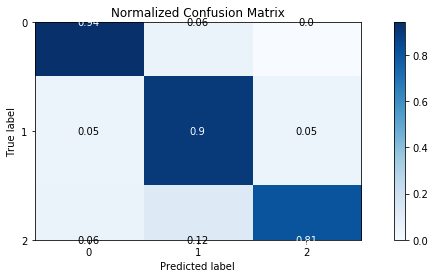

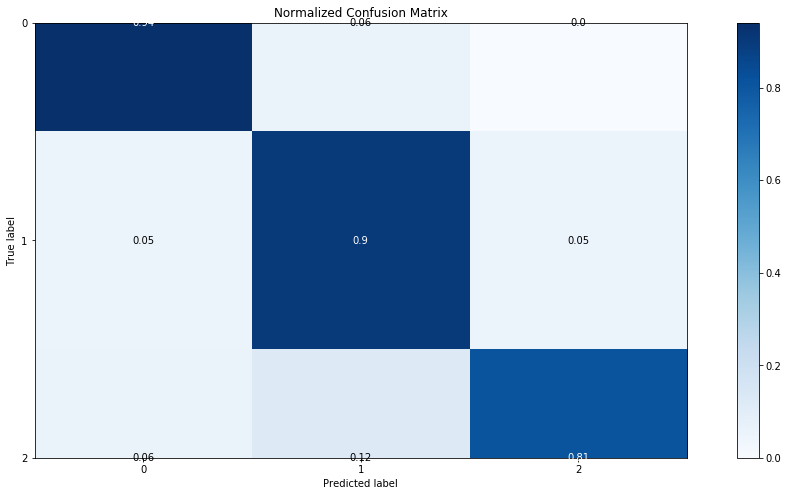

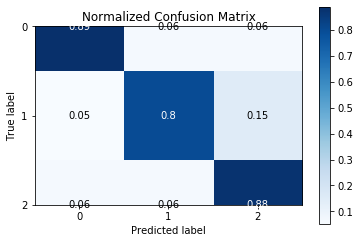

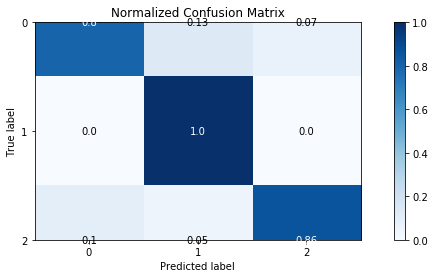

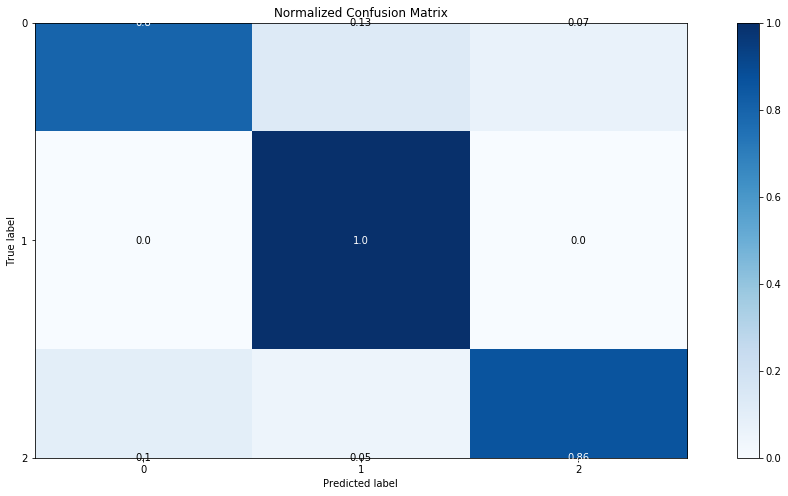

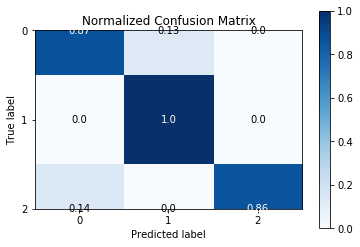

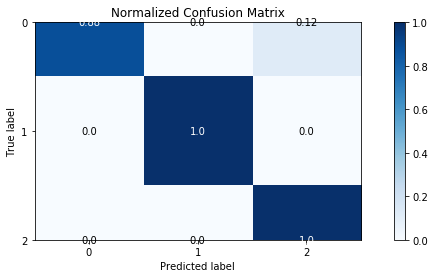

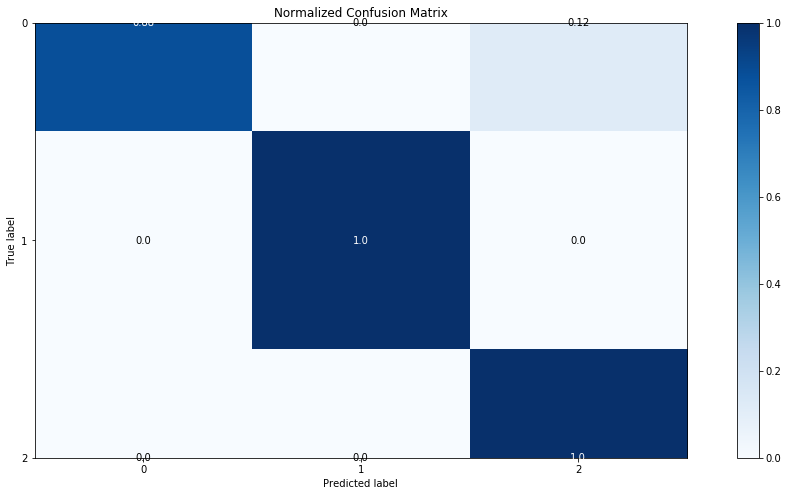

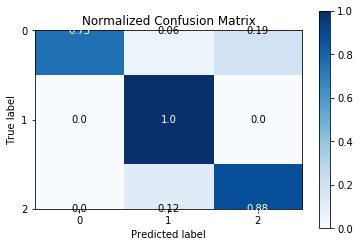

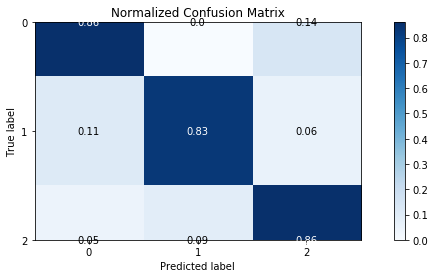

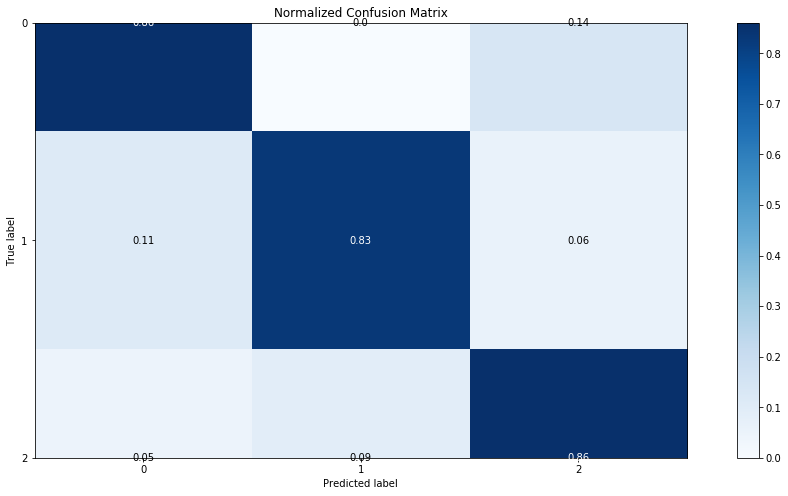

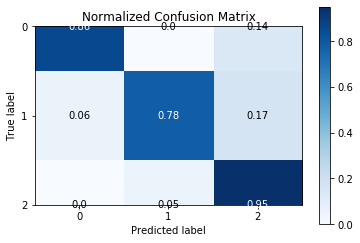

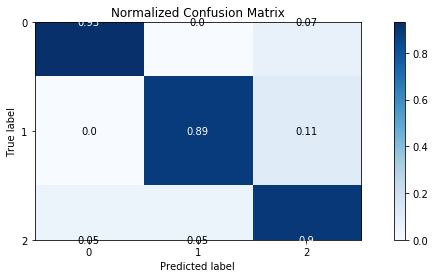

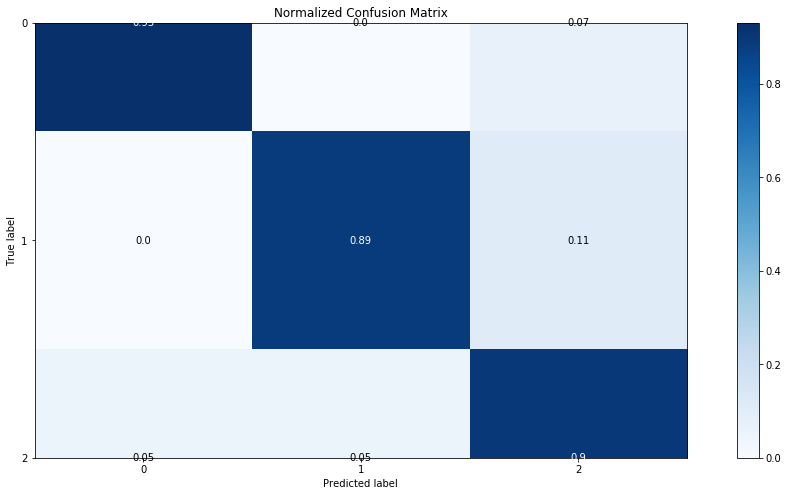

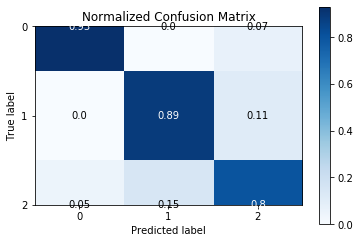

In [62]:
%matplotlib inline
fold_no = 1
plt.close('all')
print("Total Fold No.: {}\n\n" .format(total_fold))
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("No. of Training Dataset in Fold ", fold_no, ": ", len(X_train))
    print("No. of Testing Dataset in Fold ", fold_no, ": ", len(X_test))
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW using DT with Entropy
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
        
    nb_gaussian_pv_dbow = GaussianNB()
    nb_gaussian_pv_dbow.fit(X_trained, y_trained)
    y_pred = nb_gaussian_pv_dbow.predict(X_tested)
    
    print("FOR PV_DBOW Using Gaussian Naive Bayes: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(12,4), normalize=True)
    temp = "GaussianNB Confusion Matrix of "+str(fold_no)+".png"
    plt.savefig(temp)
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
#     print("Precision ROC Curve:\n")
# #     skplt.metrics.plot_precision_recall_curve(y_test, y_pred)
#     skplt.metrics.plot_roc(y_test, y_pred)
#     plt.show()
    print("\n\n")
    
    
    
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    nb_gaussian_pv_dm = GaussianNB()
    nb_gaussian_pv_dm.fit(X_trained, y_trained)
    y_pred_pv_dm = nb_gaussian_pv_dm.predict(X_tested)
    
    print("FOR PV_DM Using Gaussian Naive Bayes: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(18,8), normalize=True)
    temp = "GaussianNB Confusion Matrix of "+str(fold_no)+".png"
    plt.savefig(temp)
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
#     print("Precision Recall Curve:\n")
#     skplt.metrics.plot_precision_recall_curve(y_test, y_pred)
#     plt.show()
    print("\n\n")
    
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    nb_gaussian_mixed = GaussianNB()
    nb_gaussian_mixed.fit(X_trained, y_trained)
    y_pred = nb_gaussian_mixed.predict(X_tested)
    
    print("FOR PAIRED Model Using Gaussian Naive Bayes: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
    temp = "GaussianNB Confusion Matrix of "+str(fold_no)+".png"
    plt.savefig(temp)
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
#     print("Precision Recall Curve:\n")
#     skplt.metrics.plot_precision_recall_curve(y_test, y_pred)
#     temp = "GaussianNB Precision Recall Curve of "+str(fold_no)+".png"
#     plt.savefig(temp)
    print("\n\n")
    fold_no+=1